In [476]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as pt


In [477]:
td = pd.read_csv("Titanic-Dataset.csv")

In [478]:
td.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [479]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [480]:
td = td.drop(columns = 'Cabin', axis=1)

In [481]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [482]:
td['Age'].fillna(td['Age'].mean(),inplace=True)

In [483]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [484]:
print(td['Embarked'].mode())

0    S
dtype: object


In [485]:
td['Embarked'].fillna(td['Embarked'].mode()[0], inplace=True) 

In [486]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [487]:
td.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0, 'C':1,'Q':2}}, inplace=True) 

In [488]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [489]:
td=td.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [490]:
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [491]:
feature_cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'] 

In [492]:
X=td[feature_cols]
Y=td['Survived'] 

In [493]:
X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=101,stratify=Y)

In [494]:
Y_train.value_counts(normalize=True) 

0    0.616372
1    0.383628
Name: Survived, dtype: float64

In [495]:
Y_test.value_counts(normalize=True) 

0    0.615672
1    0.384328
Name: Survived, dtype: float64

In [496]:
X_train.shape, Y_train.shape


((623, 7), (623,))

In [497]:
X_test.shape, Y_test.shape

((268, 7), (268,))

In [498]:
model=DecisionTreeClassifier(criterion="entropy", max_depth=5,random_state = 101)

In [499]:
model=model.fit(X_train,Y_train)

In [500]:
X_train_pred=model.predict(X_train)

In [501]:
train_acc = accuracy_score(Y_train,X_train_pred)
print('accuracy of training values:', train_acc)

accuracy of training values: 0.85553772070626


In [502]:
X_test_pred=model.predict(X_test)

In [503]:
test_acc = accuracy_score(Y_test,X_test_pred)
print('accuracy of test values:', test_acc)

accuracy of test values: 0.7873134328358209


[Text(167.4, 199.32, 'X[1] <= 0.5\nentropy = 0.961\nsamples = 623\nvalue = [384, 239]'),
 Text(87.048, 163.07999999999998, 'X[5] <= 15.173\nentropy = 0.644\nsamples = 390\nvalue = [326, 64]'),
 Text(40.176, 126.83999999999999, 'X[2] <= 10.5\nentropy = 0.452\nsamples = 232\nvalue = [210, 22]'),
 Text(26.784000000000002, 90.6, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(53.568000000000005, 90.6, 'X[5] <= 7.746\nentropy = 0.413\nsamples = 229\nvalue = [210, 19]'),
 Text(26.784000000000002, 54.359999999999985, 'X[2] <= 26.75\nentropy = 0.211\nsamples = 60\nvalue = [58, 2]'),
 Text(13.392000000000001, 18.119999999999976, 'entropy = 0.439\nsamples = 22\nvalue = [20, 2]'),
 Text(40.176, 18.119999999999976, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(80.352, 54.359999999999985, 'X[5] <= 7.865\nentropy = 0.471\nsamples = 169\nvalue = [152, 17]'),
 Text(66.96000000000001, 18.119999999999976, 'entropy = 0.758\nsamples = 32\nvalue = [25, 7]'),
 Text(93.74400000000001, 18.119999

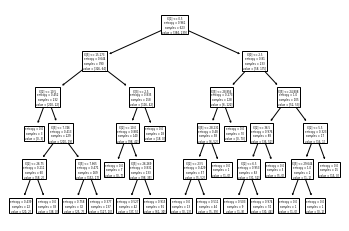

In [504]:
tree.plot_tree(model)

In [505]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('titanic')

'titanic.pdf'

In [506]:
input_data = (1,1,1,0,0,3.05,1) 
input_data_as_numpy_array = np.asarray(input_data)


In [507]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [508]:
prediction = model.predict(input_data_reshaped)
#print(prediction)
if prediction[0]==0:
    print("Sorry, Not survived") 
if prediction[0]==1:
    print("Alive")

Alive
